In [1]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [2]:
#Classification Algorithm 
#Logisitc Regression 
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#To load Dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
#how many class in target varible(output variable) : insuranceclaim
df['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [6]:
#How many 1's and 0's in insuranceclaim 
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

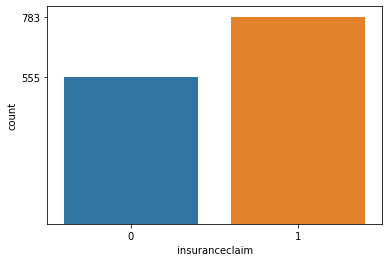

In [7]:
#visualisation How many 1's and 0's in insuranceclaim 
f=df['insuranceclaim'].value_counts()
sns.countplot(data=df,x='insuranceclaim')
plt.yticks(f)
plt.show()

In [8]:
#how many records in given dataset
df.shape

(1338, 8)

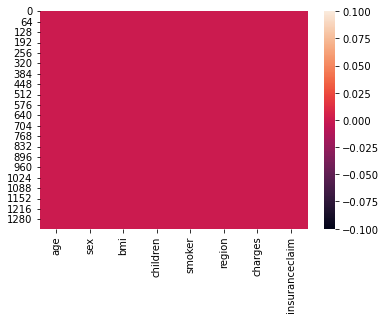

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:

#visualise null values
sns.heatmap(df.isnull())
plt.show()
#to check null values in given dataset
df.isnull().sum() 

In [10]:
#cross check
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [11]:
#To check duplicates rows 
df.duplicated().sum()

1

In [12]:
#to show duplicates rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [13]:
#to remove duplicates rows permanently from given dataframe
df.drop_duplicates(inplace=True)

In [14]:

#To check duplicates rows 
df.duplicated().sum()

0

In [15]:
#select input and output from given dataframe
X=df.drop("insuranceclaim",axis=1) #input select 2D
Y=df['insuranceclaim'] #1D output variable

In [16]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

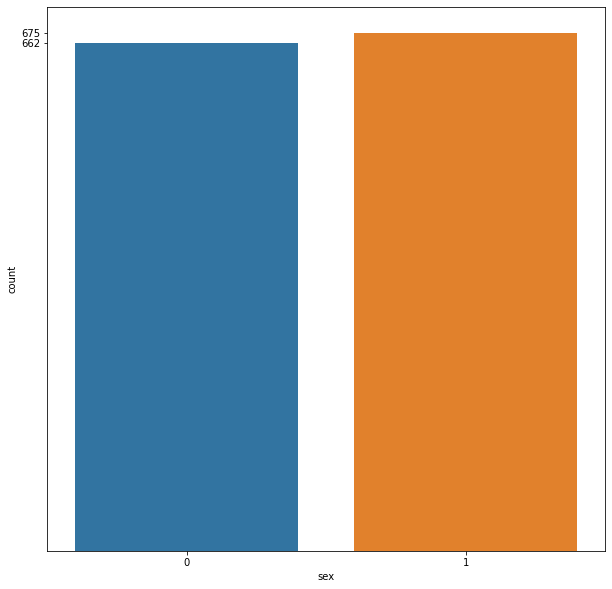

1    675
0    662
Name: sex, dtype: int64


In [18]:
f=df['sex'].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='sex')
plt.yticks(f)
plt.show()
print(f)

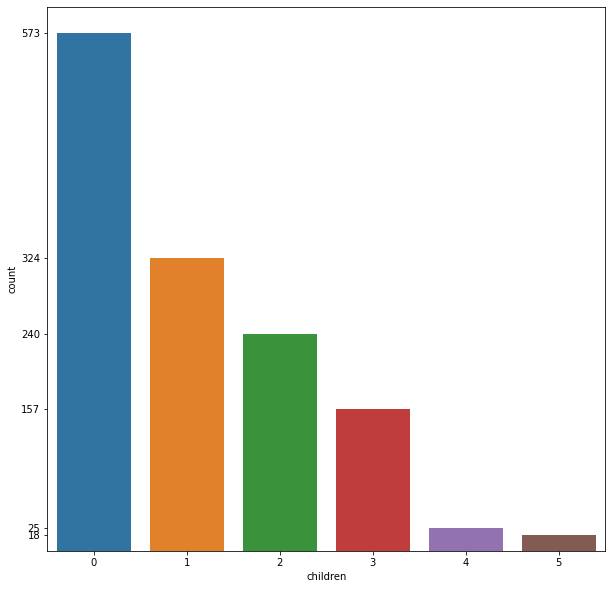

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [19]:
f=df['children'].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='children')
plt.yticks(f)
plt.show()
print(f)

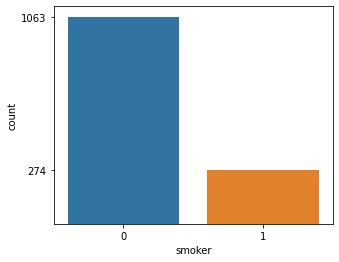

0    1063
1     274
Name: smoker, dtype: int64


In [20]:
f=df['smoker'].value_counts()
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='smoker')
plt.yticks(f)
plt.show()
print(f)

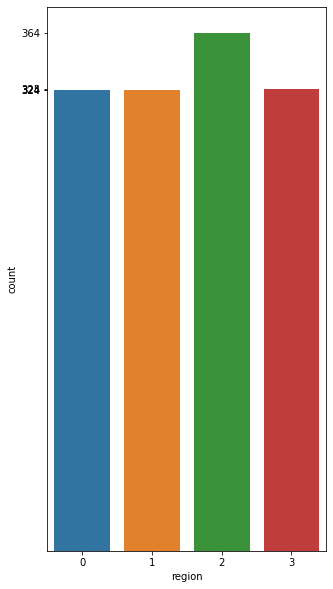

2    364
3    325
1    324
0    324
Name: region, dtype: int64


In [21]:
f=df['region'].value_counts()
plt.figure(figsize=(5,10))
sns.countplot(data=df,x='region')
plt.yticks(f)
plt.show()
print(f)

In [22]:
X.shape,Y.shape

((1337, 7), (1337,))

In [23]:
#train test split : 70%-30% 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
X_train.shape,X_test.shape

((935, 7), (402, 7))

In [25]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [26]:
X_test.head()

,age,sex,bmi,children,smoker,region,charges
629,44,0,38.950,0,1,1,42983.45850
1087,57,1,31.540,0,0,1,11353.22760
283,55,0,32.395,1,0,0,11879.10405
790,39,0,41.800,0,0,2,5662.22500
594,41,1,40.260,0,0,2,5709.16440


In [27]:
#Apply StandardScaler on X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #2D numpy array
X_test=ss.transform(X_test) #2D numpy array

In [28]:
type(X_train),type(X_test),X_train.ndim,X_test.ndim

(numpy.ndarray, numpy.ndarray, 2, 2)

In [29]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [30]:
X_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

In [31]:
#Logistic Regression : - 
from sklearn.linear_model  import LogisticRegression

In [32]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [33]:
#train the model with  LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
#test the model with 30% data 
Y_pred=lr.predict(X_test)

In [35]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [36]:
Y_test

629     1
1087    1
283     1
790     1
594     1
       ..
924     0
873     1
731     0
363     0
10      1
Name: insuranceclaim, Length: 402, dtype: int64

In [37]:
dict={'Actual output':Y_test,'Predicted Output':Y_pred}
#converts dictionary into DataFrame
df1=pd.DataFrame(dict)
df1

,Actual output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [38]:
#Generate Report means find accuracy of model 
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
#classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [40]:
#confusion MAtrix 
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [41]:
#use DecisionTreeClassifier Algorithm   
from sklearn.tree import DecisionTreeClassifier

In [42]:
#create object of  DecisionTreeClassifier class
dt=DecisionTreeClassifier() #bydefault gini index method 

In [43]:
#train the model with DecisionTreeClassifier class with 70% data  
#use inbuilt method fit() of DecisionTreeClassifier class 
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
#to check information gain of each input (features)
#use features_importances_ which is inbuilt method of DecisionTreeClassifier 
#class
IG=dt.feature_importances_
print("Inforamtion Gain : ")
print(IG)

Inforamtion Gain : 
[0.08613049 0.         0.32960477 0.37644457 0.18086023 0.
 0.02695994]


In [45]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [46]:
dict={'Features':X.columns,'Information Gain':IG}
#create dataframe with the help of dictionary
df1=pd.DataFrame(dict)
df1

,Features,Information Gain
0,age,0.086130
1,sex,0.000000
2,bmi,0.329605
3,children,0.376445
4,smoker,0.180860
5,region,0.000000
6,charges,0.026960


In [47]:
#sorting descending order 
df1.sort_values('Information Gain',ascending=False)

,Features,Information Gain
3,children,0.376445
2,bmi,0.329605
4,smoker,0.180860
0,age,0.086130
6,charges,0.026960
1,sex,0.000000
5,region,0.000000


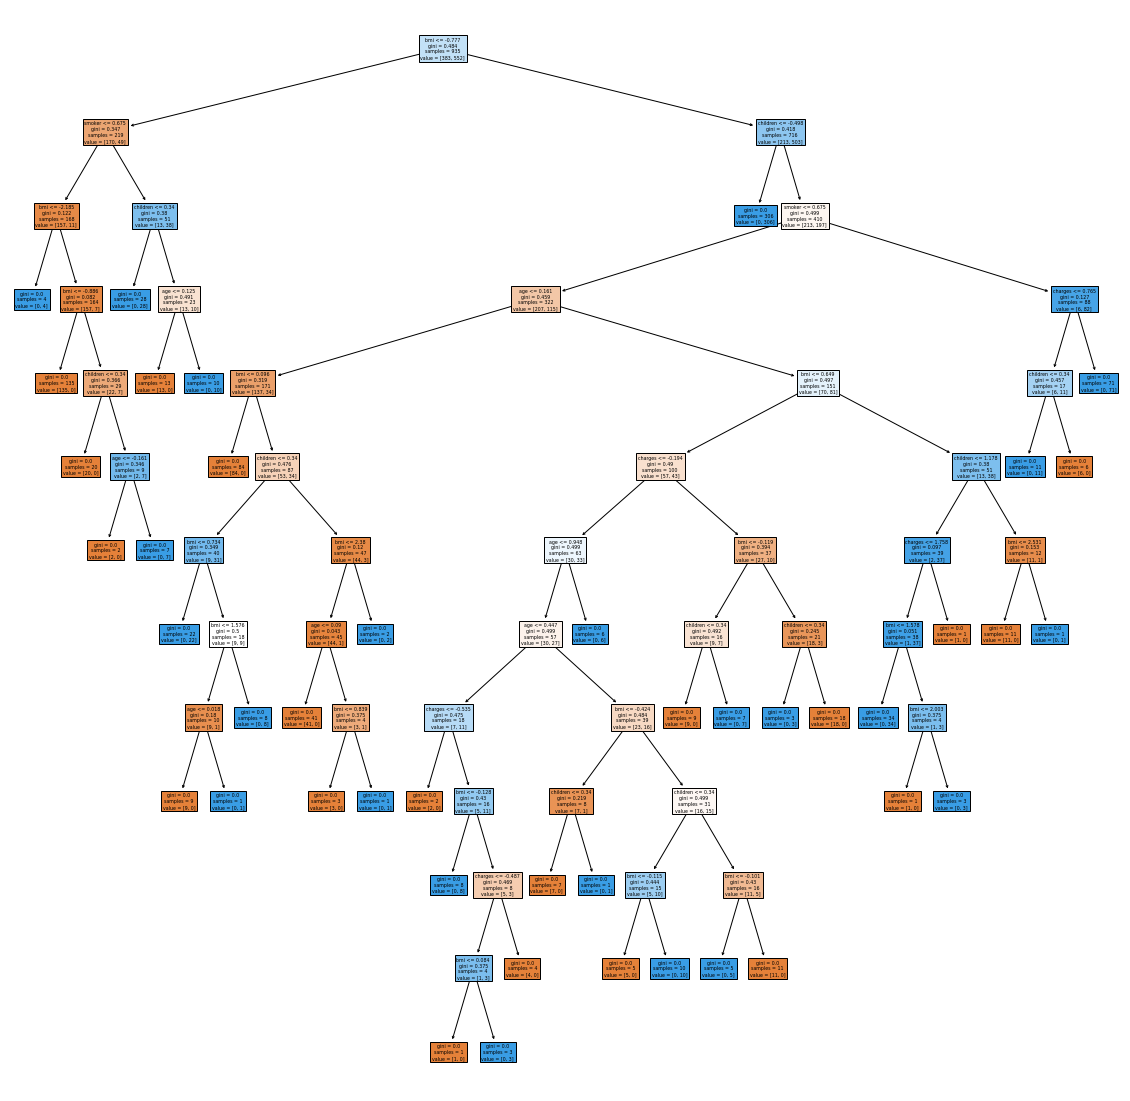

In [49]:
#create a tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [50]:
#Test the model with 30% data , use predict method
Y_pred=dt.predict(X_test) 
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
#classification report 
print(classification_report(Y_test,Y_pred))
#confusion MAtrix 
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       172
           1       0.98      0.98      0.98       230

    accuracy                           0.98       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.98      0.98      0.98       402

[[167   5]
 [  5 225]]


In [ ]:
#Got recall =0.98 means 98% in Decision TRee (Best)
#Got recall=0.91  in Logistic regression 